In [1]:
import warnings; warnings.filterwarnings("ignore")
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import pandas as pd
import numpy as np
import mmap
import time
import os

In [3]:
#expression_link = "https://data.broadinstitute.org/ccle/CCLE_RNAseq_genes_rpkm_20180929.gct.gz"
# file = urllib.request.urlopen(expression_link); print("File Size:", f"{(file.length/(1024*1024)):,.0f}", " MB")

In [5]:
#%%time
#df = pd.read_csv(expression_link, index_col=None, compression='gzip', header=0,sep='\t',quotechar='"',skiprows=2,error_bad_lines=False)

In [2]:
expression_link = "./data/CCLE_RNAseq_genes_rpkm_20180929.gct"
print("File Size:", f"{(os.stat(expression_link).st_size/(1024*1024)):,.0f}", " MB")

File Size: 657  MB


In [4]:
%%time
df = pd.read_csv(expression_link, index_col=False, header=0, sep='\t', quotechar='"', skiprows=2, error_bad_lines=False)

Wall time: 11.2 s


In [6]:
df.drop(['Name'],axis=1,inplace=True)
df.rename({'Description':'GeneSymbol'},axis=1,inplace=True)

In [7]:
df0 = df.iloc[:, 0:8]; df0.columns.tolist()

['GeneSymbol',
 '22RV1_PROSTATE',
 '2313287_STOMACH',
 '253JBV_URINARY_TRACT',
 '253J_URINARY_TRACT',
 '42MGBA_CENTRAL_NERVOUS_SYSTEM',
 '5637_URINARY_TRACT',
 '59M_OVARY']

In [8]:
df = df.set_index('GeneSymbol').transpose()
df.reset_index(inplace=True)
df.rename_axis(None, axis=1, inplace=True)

In [9]:
df = df.rename(columns = {'index': 'Cell_line'})
df[['Cell_line','Tissue']] = df['Cell_line'].str.split('_', n=1, expand=True)

In [10]:
first_column = df.pop("Tissue"); df.insert(0,'Tissue', first_column)
first_column = df.pop("Cell_line"); df.insert(0,'Cell_line', first_column)

In [11]:
tissuess = list(set(list(df['Tissue'])));print(tissuess)

['ENDOMETRIUM', 'BONE', 'PANCREAS', 'PROSTATE', 'LUNG', 'LARGE_INTESTINE', 'BILIARY_TRACT', 'CERVIX', 'SKIN', 'AUTONOMIC_GANGLIA', 'SALIVARY_GLAND', 'SOFT_TISSUE', 'FIBROBLAST', 'CENTRAL_NERVOUS_SYSTEM', 'SMALL_INTESTINE', 'OVARY', 'THYROID', 'UPPER_AERODIGESTIVE_TRACT', 'URINARY_TRACT', 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'LIVER', 'KIDNEY', 'STOMACH', 'BREAST', 'OESOPHAGUS', 'PLEURA']


In [12]:
#tissues = ["PROSTATE","STOMACH","URINARY_TRACT","BREAST"]
#tissues = ["PROSTATE","BREAST"]
#df = df[df['Tissue'].isin(tissues)]

In [13]:
df2 = pd.melt(df,id_vars=['Tissue','Cell_line'],var_name='GeneSymbol',value_name='GeneExpression')

In [14]:
print(df2.sample(5))

                          Tissue Cell_line    GeneSymbol  GeneExpression
10127244  CENTRAL_NERVOUS_SYSTEM     KNS42    AC099778.1          0.0000
12002717              FIBROBLAST      T173  NAALADL2-AS3          0.0000
16238998                    LUNG     HCC15       ZFYVE16         13.8327
20372992                    LUNG    CORL47   RP11-15H7.2          0.0000
50539829                    LUNG      LU65   CTC-471J1.9          0.0000


In [15]:
#GenesOfInterest = ["DDX11L1", "PLD1"]
#df2 = df2[df2['GeneSymbol'].isin(GenesOfInterest)]

In [16]:
GeneOfInterest = "FERP1"
df2 = df2[df2['GeneSymbol'] == GeneOfInterest]

In [17]:
df2['GeneExpression'] = np.log2(df2['GeneExpression']+0.1)

In [18]:
print(df2.sample(5))

                   Tissue Cell_line GeneSymbol  GeneExpression
56075542             SKIN    UACC62      FERP1       -0.524888
56075543           BREAST   UACC812      FERP1       -0.909675
56074570             SKIN     A2058      FERP1       -1.799330
56075392  LARGE_INTESTINE   SNU1033      FERP1       -2.025853
56074735      SOFT_TISSUE      G401      FERP1       -0.555742


In [19]:
df2.shape

(1019, 4)

In [20]:
Tissues = list(set(list(df2['Tissue'])));print(Tissues)

['ENDOMETRIUM', 'BONE', 'PANCREAS', 'PROSTATE', 'LUNG', 'LARGE_INTESTINE', 'BILIARY_TRACT', 'CERVIX', 'SKIN', 'AUTONOMIC_GANGLIA', 'SALIVARY_GLAND', 'SOFT_TISSUE', 'FIBROBLAST', 'CENTRAL_NERVOUS_SYSTEM', 'SMALL_INTESTINE', 'OVARY', 'THYROID', 'UPPER_AERODIGESTIVE_TRACT', 'URINARY_TRACT', 'HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'LIVER', 'KIDNEY', 'STOMACH', 'BREAST', 'OESOPHAGUS', 'PLEURA']


In [21]:
#df2 = df2.sample(frac=0.5, replace=False, random_state=1)

In [22]:
df2.shape

(1019, 4)

In [23]:
palette = sns.color_palette("YlGn", n_colors=25)
palette = sns.color_palette("pastel")

In [24]:
palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [25]:
tissue_order = ['THYROID', 'STOMACH', 'BREAST', 'PANCREAS', 'OESOPHAGUS', 'URINARY_TRACT', 'BONE', 'SKIN', 'FIBROBLAST',
                'CERVIX', 'LUNG', 'PROSTATE', 'PLEURA', 'OVARY', 'KIDNEY', 'ENDOMETRIUM', 'LIVER', 'SALIVARY_GLAND','SOFT_TISSUE']

In [26]:
pairs = [('CERVIX', 'SKIN'), ('FIBROBLAST', 'SKIN'), ('LUNG', 'SKIN'), ('PROSTATE', 'SKIN')]

In [27]:
hue_plot_params = {'data':df2, 'x':"Tissue", 'y':'GeneExpression', "palette":palette}

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SKIN vs. FIBROBLAST: Mann-Whitney-Wilcoxon test two-sided, P_val:6.422e-06 U_stat=1.424e+03
SKIN vs. CERVIX: Mann-Whitney-Wilcoxon test two-sided, P_val:4.145e-02 U_stat=2.200e+01
SKIN vs. LUNG: Mann-Whitney-Wilcoxon test two-sided, P_val:7.494e-03 U_stat=3.462e+03
SKIN vs. PROSTATE: Mann-Whitney-Wilcoxon test two-sided, P_val:1.328e-02 U_stat=9.000e+01


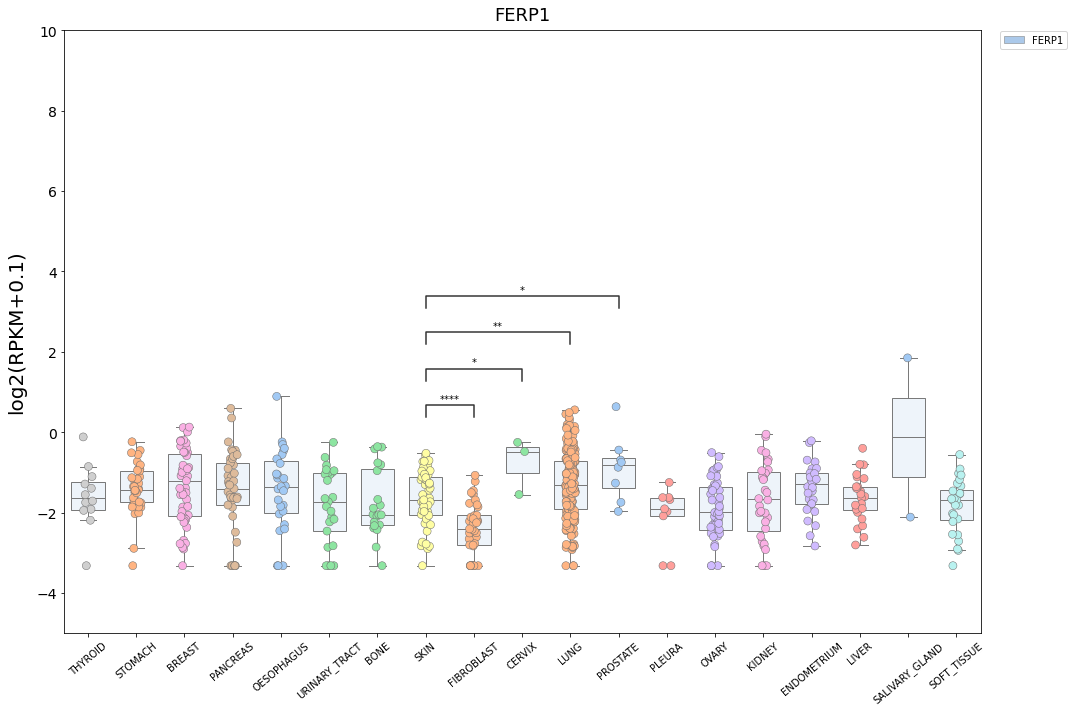

Wall time: 13.3 s


In [28]:
%%time
fig, ax = plt.subplots(figsize=(15, 10))
plt.subplots_adjust(wspace=0.02, hspace=0.01)
sns.plotting_context("notebook", font_scale = 1.4)

ax = sns.boxplot(ax=ax, data=df2, x='Tissue', y='GeneExpression', order = tissue_order, hue="GeneSymbol",
                 palette = palette, width=0.7, fliersize=0, linewidth=1)
handles, labels = ax.get_legend_handles_labels()
ax = sns.stripplot(data=df2, x="Tissue", y="GeneExpression", order = tissue_order, hue="Tissue", jitter=True,
                   dodge=True, palette = palette, linewidth=0.5, size=8, split=False, edgecolor='gray', alpha=1)
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1)
plt.gca().set_yscale('linear'); plt.ylim(-5, 10) 
ax.set_title(GeneOfInterest, fontsize=18, pad=10)
plt.xlabel("", labelpad=10); plt.ylabel("log2(RPKM+0.1)", fontsize=20, labelpad=10) 
plt.xticks(fontsize = 10, rotation = 40); plt.yticks(fontsize=14, rotation=0)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor(); patch.set_facecolor((r, g, b,.2))
try:
    annotator = Annotator(ax, pairs, order=tissue_order, **hue_plot_params)
    annotator.configure(test='Mann-Whitney', text_format='star').apply_and_annotate()
except (ValueError) as i:
    print("\nValueError: " + str(i) + "\n")

plt.tight_layout()
plt.show()